### Here We use titanic dataset , trying to predict a classification-survival or deceased

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Exploratory Data Analysis

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Missing Data

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Visualization of Missing Data Points

<Axes: >

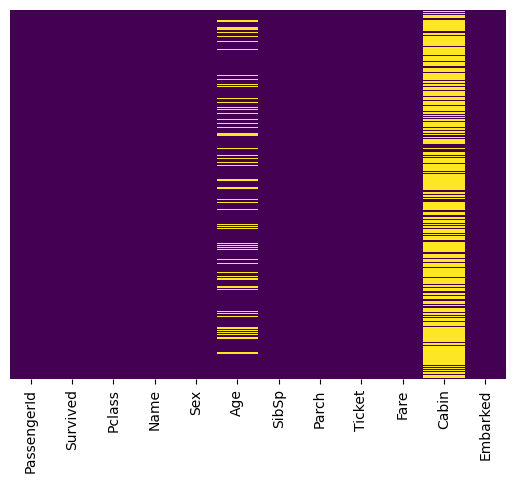

In [9]:
sns.heatmap(train.isnull(), yticklabels= False, cbar = False, cmap = 'viridis')

- **Roughly 20 percent of Age Data is Missing. The Proportion of Age missing is likely small enough for reasonable repalcement with some form of imputation.**
- **Cabin Column - It looks like missing too much data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known : 1 or 0**

### Check survived or not column

In [10]:
train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

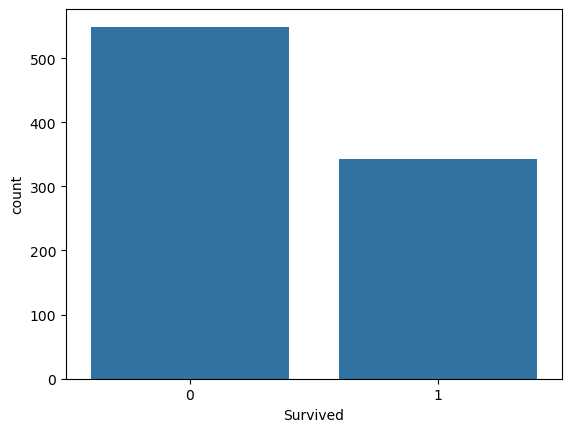

In [11]:
sns.countplot(data=train, x = 'Survived')

<Axes: xlabel='Survived', ylabel='count'>

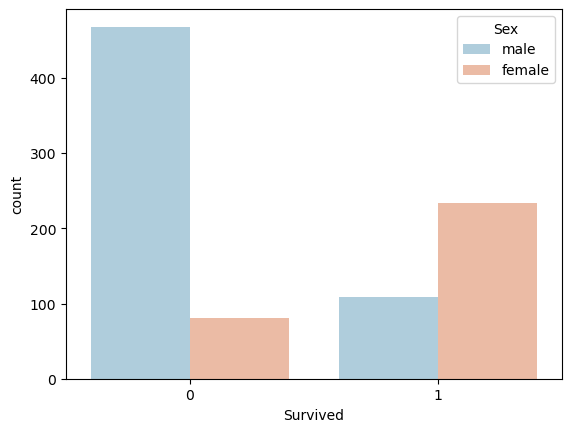

In [12]:
sns.countplot(data=train, x= 'Survived', hue='Sex',palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

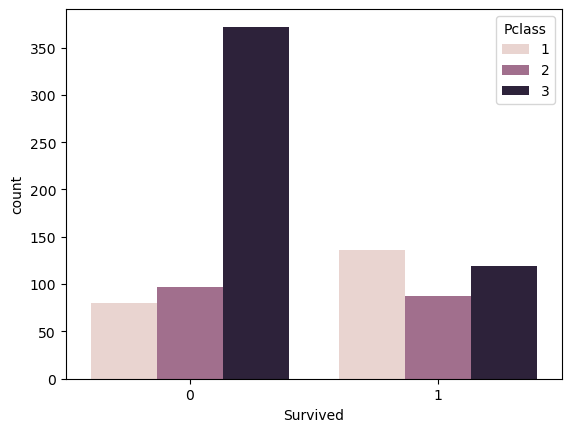

In [13]:
sns.countplot(data=train, x= 'Survived',hue='Pclass')

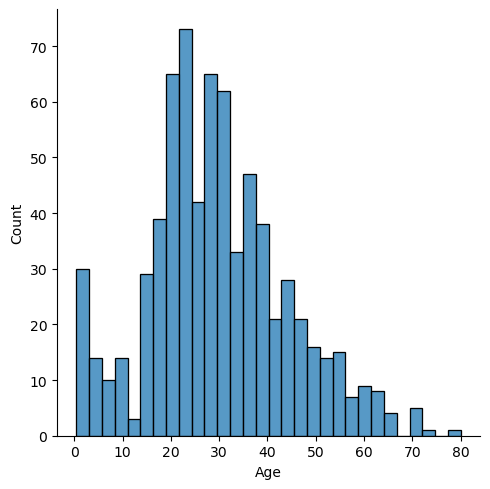

In [14]:
sns.displot(train['Age'].dropna(), bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

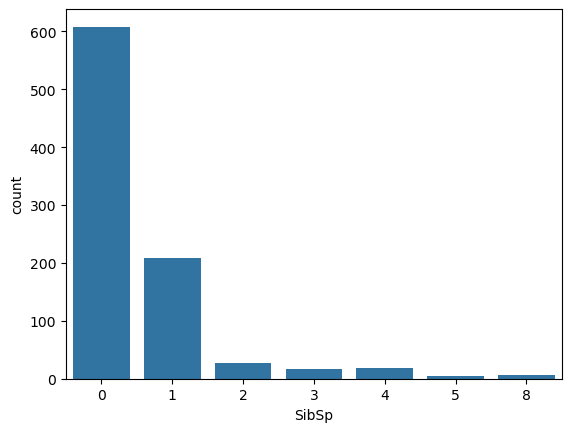

In [15]:
sns.countplot(data=train,x='SibSp')

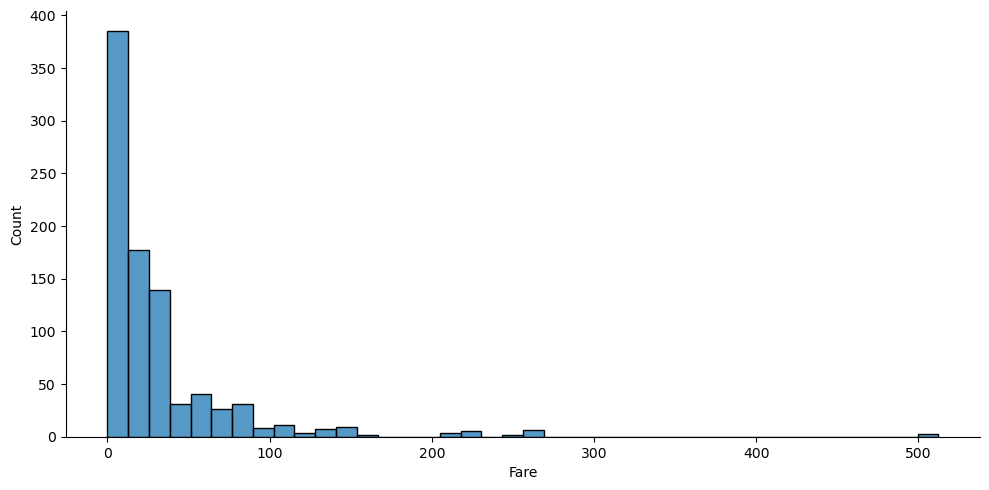

In [16]:
sns.displot(train['Fare'],bins=40,height=5,aspect=2)

### Data Cleaning

**We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all passengers(imputation). However we can be smarter about this and check the average age by passenger class**

<Axes: xlabel='Pclass', ylabel='Age'>

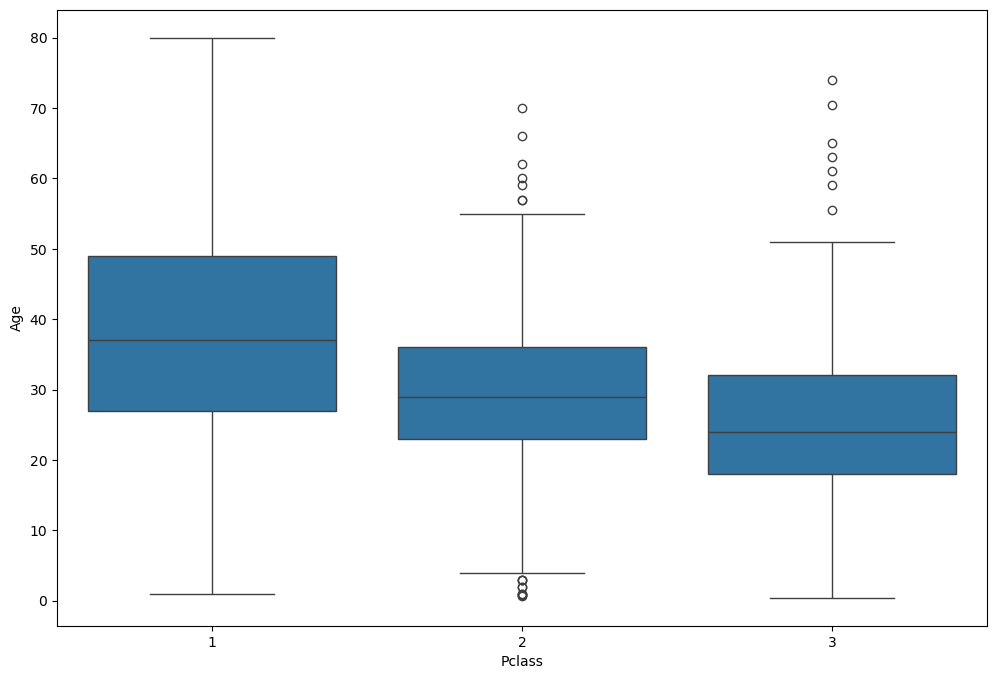

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x ="Pclass", y= 'Age')

In [18]:
# calculate the average age per class
Age_by_class_df = pd.DataFrame(train.groupby('Pclass')['Age'].mean())
Age_by_class_df.head()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [19]:
Age_by_class_df['Round_Age'] = np.array([38,29,25])

In [20]:
Age_by_class_df.head()

,Age,Round_Age
Pclass,,
1,38.233441,38
2,29.877630,29
3,25.140620,25


In [21]:
Age_by_class_df['Round_Age'].loc[1]

38

In [22]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
        return Age_by_class_df['Round_Age'].loc[pclass]
    return age

In [23]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\akkan\AppData\Local\Temp\ipykernel_8008\3520170478.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = cols[0]
C:\Users\akkan\AppData\Local\Temp\ipykernel_8008\3520170478.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass = cols[1]


In [24]:
train.Age.isnull().sum()

0

### Check Heatmap Again after filling the missing vlaues from Age column

<Axes: >

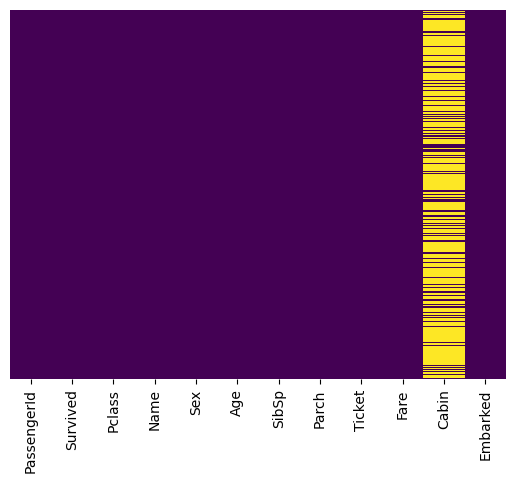

In [25]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Drop the cabin column

In [30]:
train =  train.drop('Cabin',axis=1)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
train.shape

(891, 11)

<Axes: >

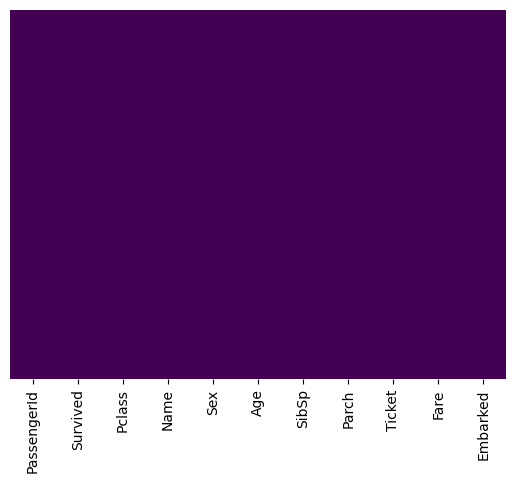

In [33]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')


In [34]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

##### Droped Embarked 2 Missing rows

In [35]:
train = train.dropna()

In [36]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [38]:
train.shape

(889, 11)

#### Handling Categorical fetaures

**We'll need to convert categorical features into dummy variables using panda. Otherwise our Machine learning algorithn won't be able to directly take in those features as inputs**

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [44]:
# sex column --> one hot encoding
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [45]:
# embark column
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [46]:
# combine these 3 datframes
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [47]:
# dropped those columns that not are in use
train = train.drop(['Name','Ticket','Sex','Embarked'],axis=1)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [49]:
# Drop passenger id which is not useful for our model
train = train.drop('PassengerId', axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [51]:
train.shape

(889, 9)

# Buliding a Logistic Regression Model

In [52]:
# seprate features and lables
X = train.drop('Survived',axis=1)
y = train['Survived']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [55]:
from sklearn.linear_model import LogisticRegression

In [58]:
lg = LogisticRegression(max_iter=1000)

In [59]:
lg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [60]:
predictions = lg.predict(X_test)

### Evluation

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [72]:
cm = confusion_matrix(y_test, predictions)
cm

array([[150,  13],
       [ 31,  73]], dtype=int64)

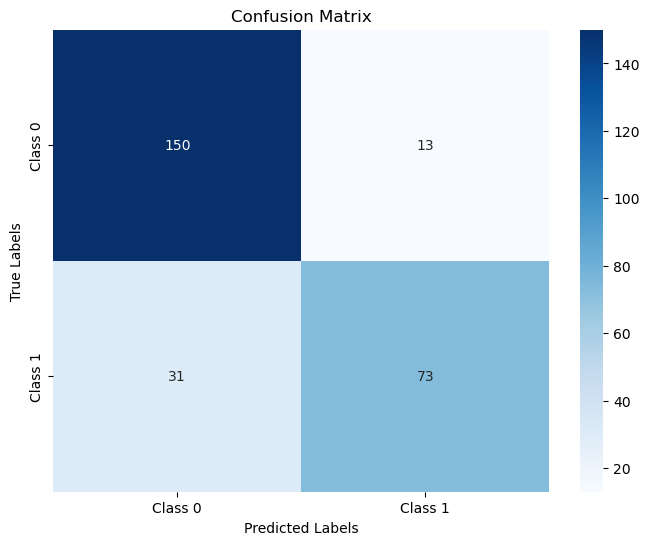

In [74]:
# create a heatmap using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, fmt='d',cmap="Blues", xticklabels=['Class 0','Class 1'],yticklabels=['Class 0','Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()